In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Read csv
df = pd.read_csv('Resources/data.csv', parse_dates=True, na_values={'price': 0, 'bedrooms': 0,})
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4598 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4598.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.579059e+05,3.402349,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639299e+05,0.906273,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
# TO count number of NaN/null values in each column 
df.isna().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# Dimensions 
df.shape

(4549, 18)

In [9]:
# Removing outliers using z-score calculations 
df['price_zscore'] = zscore(df['price'])
df['sqft_living_zscre'] = zscore(df['sqft_living'])
df['sqft_lot_zscre'] = zscore(df['sqft_lot'])
df['sqft_above_zscre'] = zscore(df['sqft_above'])
df['sqft_basement_zscre'] = zscore(df['sqft_basement'])

df = df[(df.price_zscore < 3) & (df.price_zscore > -3)]
df = df[(df.sqft_living_zscre < 3) & (df.sqft_living_zscre > -3)]
df = df[(df.sqft_lot_zscre < 3) & (df.sqft_lot_zscre > -4)]
df = df[(df.sqft_above_zscre < 3) & (df.sqft_above_zscre > -3)]
df = df[(df.sqft_basement_zscre < 3) & (df.sqft_basement_zscre > -3)]

In [10]:
df.drop(columns=['price_zscore','sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,5.188209e+05,3.362990,2.110640,2042.627608,10688.168998,1.504357,0.004815,0.200413,3.453336,1753.710846,288.916762,1970.325384,813.535198
std,2.837418e+05,0.882343,0.720719,797.319997,12729.773715,0.538307,0.069234,0.702035,0.675718,749.303444,416.966221,29.853931,980.300135
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1950.000000,0.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1550.000000,0.000000,1974.000000,0.000000
75%,6.395000e+05,4.000000,2.500000,2540.000000,10375.000000,2.000000,0.000000,0.000000,4.000000,2220.000000,590.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,4960.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4380.000000,1690.000000,2014.000000,2014.000000


In [12]:
df[df['statezip'].str[0:2] != 'WA']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [13]:
df.drop(columns=["country", "statezip","street",'date',
                 'city', 'view', 'waterfront', 
                 'sqft_above', 'sqft_basement', 'condition', 
                 'sqft_lot', 'floors', 'yr_renovated'], inplace=True)

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,yr_built
0,313000.000000,3.0,1.50,1340,1955
2,342000.000000,3.0,2.00,1930,1966
3,420000.000000,3.0,2.25,2000,1963
4,550000.000000,4.0,2.50,1940,1976
5,490000.000000,2.0,1.00,880,1938
...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,1954
4596,534333.333333,3.0,2.50,1460,1983
4597,416904.166667,3.0,2.50,3010,2009
4598,203400.000000,4.0,2.00,2090,1974


In [15]:
df.to_csv('data_clean.csv', index=False)

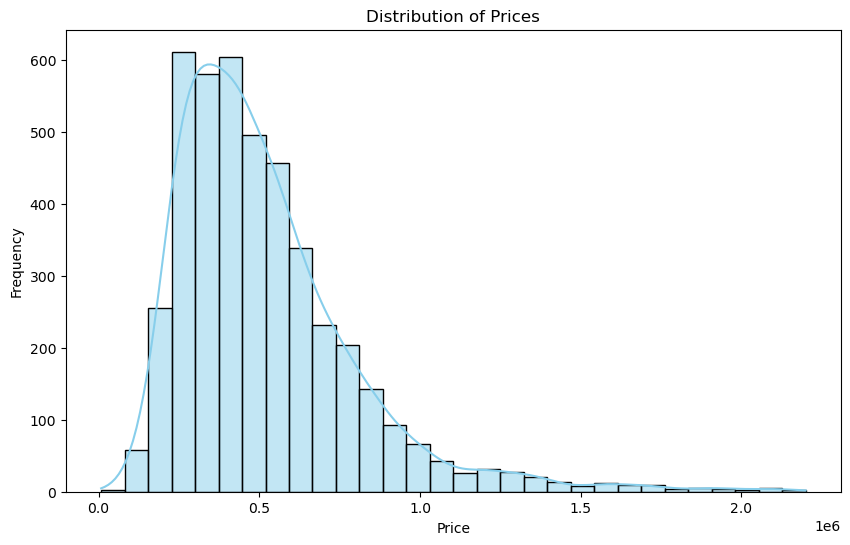

In [16]:
# Histogram of Price 
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('distribution of prices.png')
plt.show()

C:\Users\seiha\AppData\Local\Temp\ipykernel_12004\2606706906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bedrooms'], y=df['price'], palette='viridis')


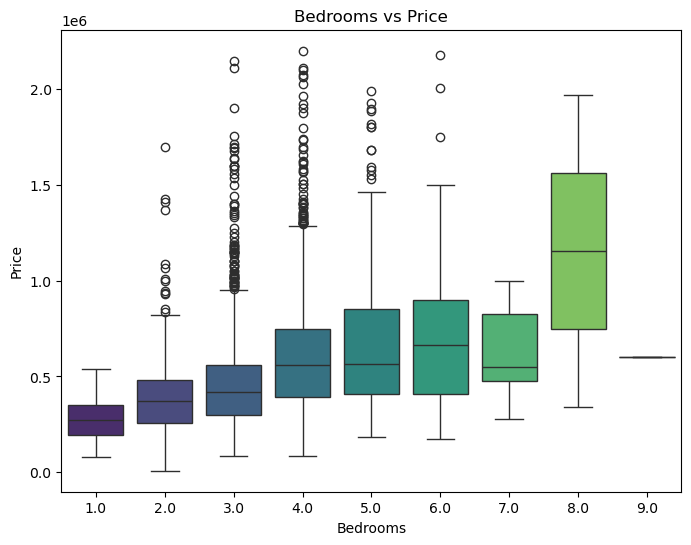

In [17]:
# Box plot 
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'], palette='viridis')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.savefig('images/bedroom vs price boxplot.png')
plt.show()

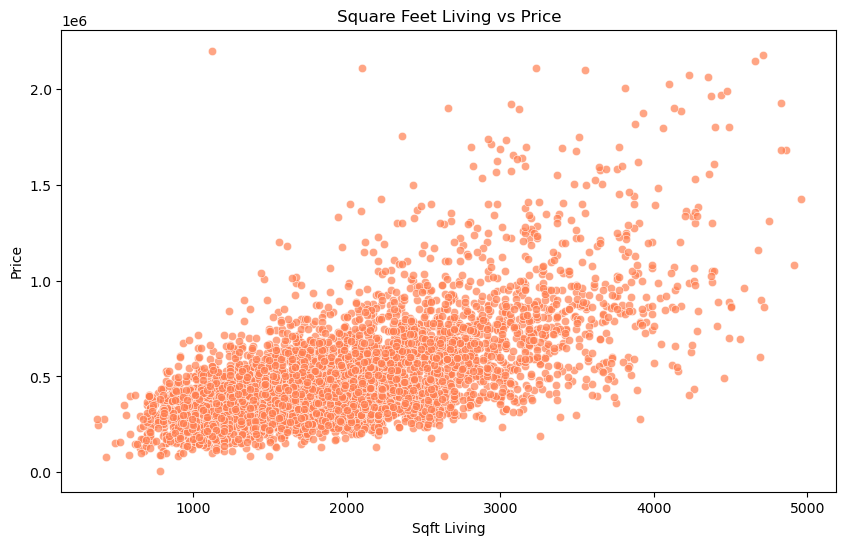

In [18]:
# Scatter Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], color='coral', alpha=0.7)
plt.title('Square Feet Living vs Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.savefig('images/price vs sqft_living scatter.png')
plt.show()

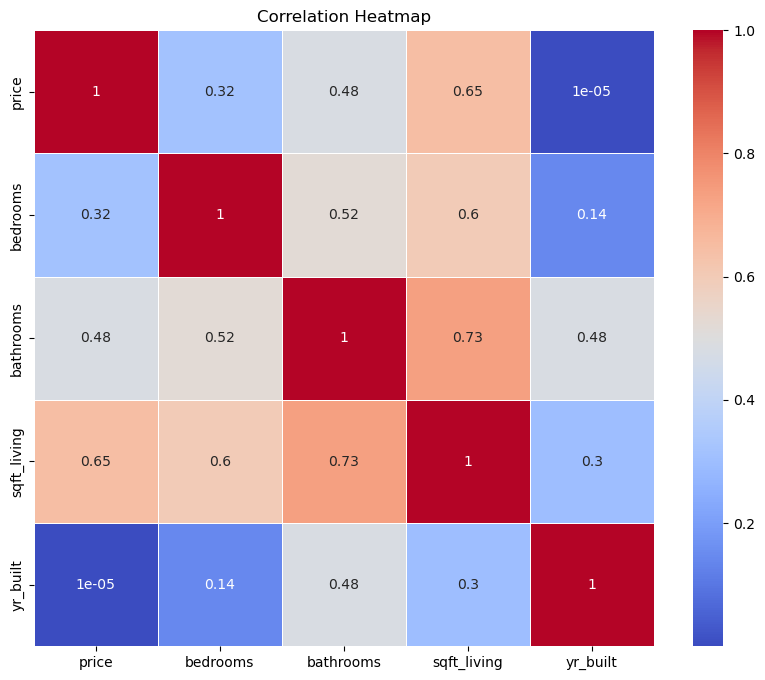

In [19]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig('images/correlation heatmap.png')
plt.show()
